# Data Collection

---



In [32]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Import Data

import gdown
import pandas as pd

# Train Data
url = 'https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW'
output = 'train_data.csv'
gdown.download(url, output, quiet=False)
train_data_df = pd.read_csv('train_data.csv')

# Test Data
url = 'https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB'
output = 'test_data.csv'
gdown.download(url, output, quiet=False)
test_data_df = pd.read_csv('test_data.csv')

# Product Identifier Mapping Table by their Title and Brand
url = 'https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h'
output = 'title_brand.csv'
gdown.download(url, output, quiet=False)
title_brand_df = pd.read_csv('title_brand.csv')


Downloading...
From: https://drive.google.com/uc?id=1-AlW7oNJHaqi3xk_9dWHUS52Dzl_FmFW
To: /content/train_data.csv
100%|██████████| 635M/635M [00:03<00:00, 178MB/s]
<ipython-input-1-ce97d94acab3>:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data_df = pd.read_csv('train_data.csv')
Downloading...
From: https://drive.google.com/uc?id=1-8TsrqTRFP-q9TM-6HinhO0ZVXFHq9TB
To: /content/test_data.csv
100%|██████████| 15.6M/15.6M [00:00<00:00, 209MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I9aPAvvYgQWdHGKtnd7IeTGXpx8vOm4h
To: /content/title_brand.csv
100%|██████████| 97.3M/97.3M [00:01<00:00, 89.7MB/s]


In [6]:
train_data_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600


In [ ]:
test_data_df.head()

,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,NaN,True,2018-06-04,A20GGWE66JW9X2,B006Z394GM,{'Color:': ' FPS01-C'},Brian C Toner,The name and description of this device are mi...,The prize for most useless invention of all ti...,1528070400
1,NaN,True,2018-02-18,ARYJWXHEYHG9M,B005BE058W,"{'Size:': ' 1000W', 'Style:': ' G2'}",Snake,One of the molex connectors on the power suppl...,MELTED MOLEX CONNECTOR,1518912000
2,NaN,True,2018-01-20,A10LHZ7WFZ7HLL,B01DA0YCNC,NaN,Amazon Customer,Remote constantly disconnects/ Roku player fre...,Bricked on the regular,1516406400
3,NaN,True,2018-06-25,A11VN8EOHNLP72,B00FBJ4KYC,NaN,Jeremy Bray,I purchased this 4 year protection plan for a ...,DO NOT BUY!!!,1529884800
4,3.0,True,2016-08-17,A194Y8P8TVT7P9,B00P7G82TS,NaN,Mark,I bought one of these and have regretted it ev...,Nightmare - don't buy,1471392000


In [ ]:
title_brand_df.head()

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


# Preliminary Data Analysis Questions

---



## **1:&nbsp;&nbsp;Analysis of `Overall` Column Distribution**


In [ ]:
# Checking for NaN values in 'overall' column

nan_count_overall = train_data_df['overall'].isna().sum()
print(f"The 'overall' column has {nan_count_overall} NaN values.")

The 'overall' column has 0 NaN values.


### Graphical Representation of Data Distribution

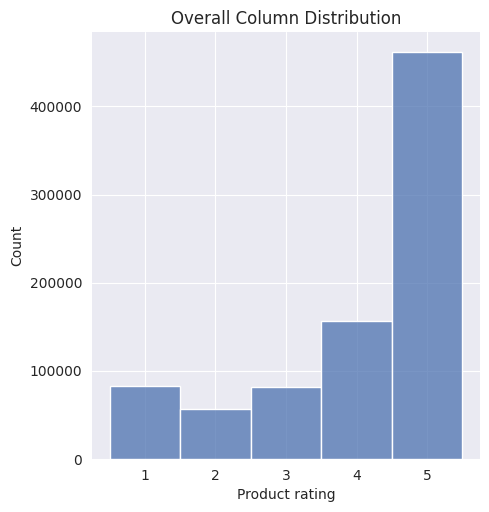

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes()
sns.set_style("darkgrid")
ax = sns.displot(train_data_df, x="overall", discrete=True, color ='b')
sns.despine(left=True, bottom=True)
plt.title("Overall Column Distribution")
plt.xlabel('Product rating')
plt.ylabel('Count')
plt.show()

<p>In the provided bar graph, an imbalance in the data distribution is observed. This is attributed to the significantly higher number of data points for a product rating of 5 compared to other ratings.

To achieve a balanced dataset, two strategies can be employed:



1.   The data points for rating 5 could be **undersampled**. This involves the random removal of some data points from the over-represented class (in this case, rating 5).
2.   The data points for other ratings could be **oversampled**. This process adds more instances from the under-represented class through bootstrapping.


Each method has its own advantages and disadvantages. While downsampling might result in information loss if not executed correctly, upsampling could potentially lead to overfitting due to the replication of minority class events.

In accordance with our data preprocessing strategy, we have elected to implement the `train_test_split` method for our dataset. Subsequent to this split, we will proceed to balance our training data, while maintaining the validation data in its original state. It is imperative to note that during the data splitting process, the `stratify` parameter should be set to `True` to ensure a uniform distribution of classes in our train and test sets. This approach is anticipated to enhance the robustness of our model and improve its predictive accuracy.</p>

##**2:&nbsp;&nbsp;Sentiment Analysis: Word Cloud Visualization and Comparative Study of Positive, Neutral, and Negative Comments**

<p>
The shared code is a prime example of employing Natural Language Processing (NLP) techniques to perform sentiment analysis on text data. Here’s a brief overview of the code’s functionality:

1. Sentiment Categorization: Each review is categorized as ‘positive’, ‘neutral’, or ‘negative’ based on the ‘overall’ rating. Ratings of 4 or 5 are considered positive, a rating of 3 is neutral, and ratings of 1 or 2 are negative.

2. Text Preprocessing: The review text is preprocessed to facilitate further analysis. This involves:



*   Lowercasing all words.
*   Removing stopwords (common words that don’t carry much meaning, like ‘the’, ‘is’, ‘at’, etc.).
*   Lemmatizing words, which means reducing them to their base or root form (e.g., ‘running’ becomes ‘run’).

3. Word Cloud Creation: A word cloud is generated for each sentiment category. The word cloud visually represents the most frequent words in each category, with more frequent words appearing larger.
</p>

In [41]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # download wordnet for lemmatization

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load your dataset
df = train_data_df

# Define sentiment categories
def categorize_sentiment(overall):
    if overall in [4, 5]:
        return 'positive'
    elif overall == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['overall'].apply(categorize_sentiment)

def preprocess_text_without_additional_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['cleaned_reviewText_without_additional_stopwords'] = df['reviewText'].apply(preprocess_text_without_additional_stopwords)

# Create WordClouds for each sentiment category
sentiments = df['sentiment'].unique()
wordclouds_without_additional_stopwords = {}


# Define a function to preprocess text (remove stopwords and lowercase)
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    additional_stopwords = ['one', 'use', 'even', 'think', 'make', 'used', 'using' ]  # Add any additional stopwords here
    additional_stopwords += [lemmatizer.lemmatize(word, 'v') for word in additional_stopwords]
    stop_words.update(additional_stopwords)
    words = text.split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['cleaned_reviewText'] = df['reviewText'].apply(preprocess_text)

# Create WordClouds for each sentiment category
sentiments = df['sentiment'].unique()
wordclouds = {}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarayetel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sarayetel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarayetel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sarayetel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Positive Sentiment**

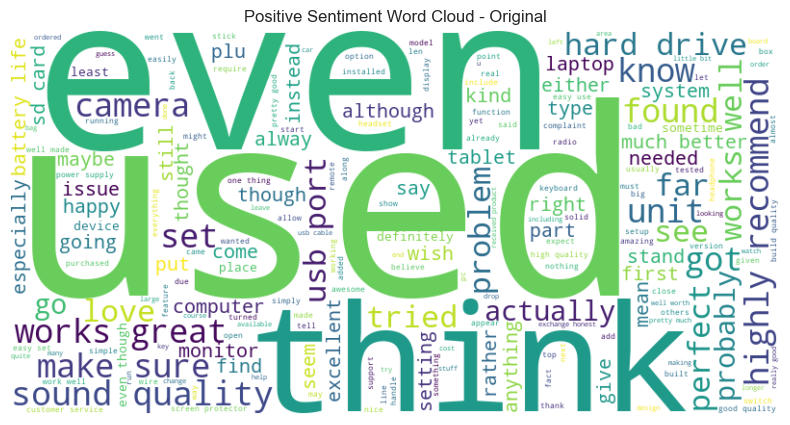

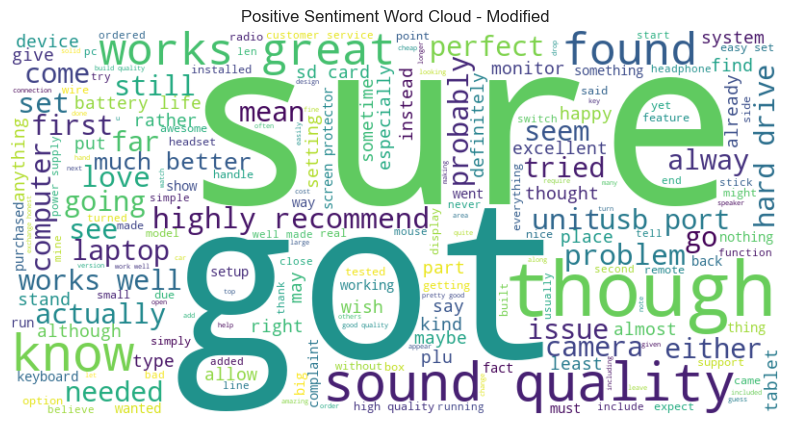

In [43]:
sentiment = 'positive'

text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviewText_without_additional_stopwords'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(sentiment.capitalize() + ' Sentiment Word Cloud - Original')
plt.axis("off")
plt.show()

text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(sentiment.capitalize() + ' Sentiment Word Cloud - Modified')
plt.axis("off")
plt.show()

<p>
Upon examination of the provided word cloud:

1.  it is discernible that the terms “sure”, “great”, “quality”, and “sound” are prominently featured. This observation suggests a frequent utilization of these terms within the context of positive reviews. Notably, the average compound sentiment score for these positive reviews is denoted as 0.66, as indicated at the base of the image.

2. In drawing a conclusion from these observations, it can be deduced that the positive sentiment expressed in the reviews is predominantly influenced by the perceived quality and sound of the product. The employment of affirming terms such as “sure” and “great” further accentuates this positive sentiment. Moreover, the average compound sentiment score of 0.66 corroborates the overall positive sentiment expressed in the reviews. This analysis provides valuable insights into customer satisfaction and product reception, which are crucial aspects of our project.
</p>

### **Neutral Sentiment**

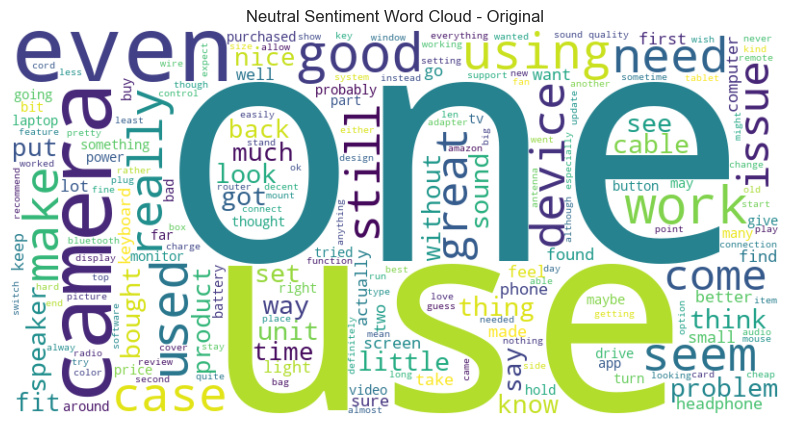

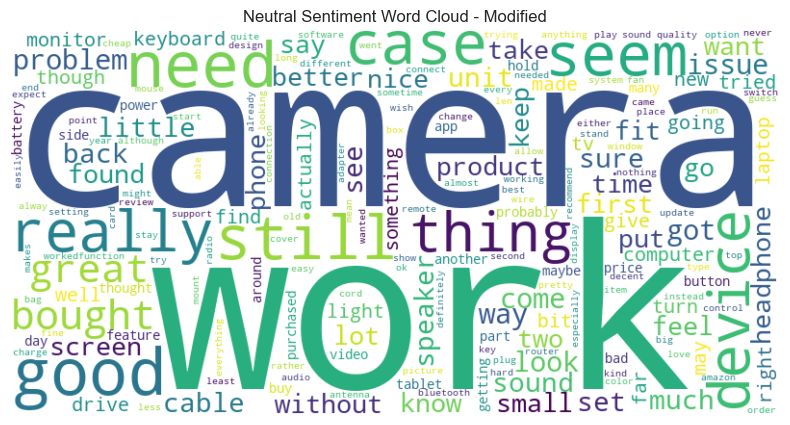

In [44]:
sentiment = 'neutral'
text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviewText_without_additional_stopwords'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(sentiment.capitalize() + ' Sentiment Word Cloud - Original')
plt.axis("off")
plt.show()

text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(sentiment.capitalize() + ' Sentiment Word Cloud - Modified')
plt.axis("off")
plt.show()


<p>
A visual representation of the frequency of words in neutral sentiment reviews is provided by the shared word cloud. The size of a word in the cloud indicates its frequency of appearance in the reviews.

1.   It is suggested by prominent words like “camera”, “need”, “good”, “case”, and “device” that these are key topics in your reviews. This could be interpreted as these aspects being important to your customers and being frequently mentioned in their reviews.
2.  The slightly positive score of 0.46 for your neutral reviews is the average compound sentiment. This indicates that a positive sentiment tends to be leaned towards even in your neutral reviews. This can be seen as a good sign as it suggests overall customer satisfaction.


</p>

### **Negative Sentiment**

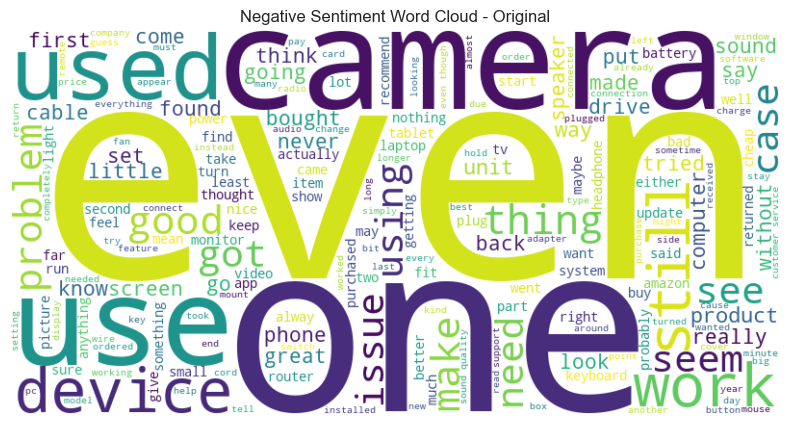

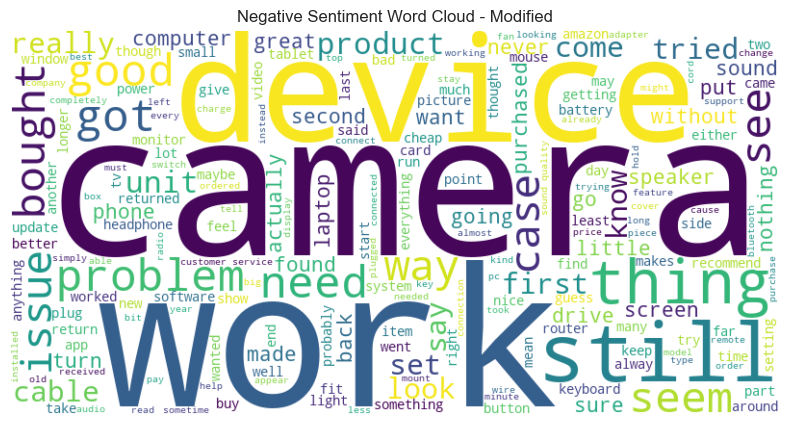

In [45]:
sentiment = 'negative'
text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviewText_without_additional_stopwords'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(sentiment.capitalize() + ' Sentiment Word Cloud - Original')
plt.axis("off")
plt.show()

text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_reviewText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(sentiment.capitalize() + ' Sentiment Word Cloud - Modified')
plt.axis("off")
plt.show()


<p>
The shared word cloud represents the most frequent words found in negative reviews. Here are some observations and potential conclusions that can be drawn from this word cloud:

1. Prominent Words: The most prominent word in the word cloud is “camera”. This suggests that many of the negative reviews are related to the camera of the product. Other notable words include “work”, “device”, “problem”, and “bought”. These words might indicate common themes in the negative reviews, such as the device not working as expected or problems encountered after buying the product.

2. Sentiment Score: The average compound sentiment score for negative reviews is 0.21. The compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). In this case, the positive score might be due to the presence of negations (e.g., “not bad”) or neutral words in the negative reviews.

3. Interpretation: The common words in the negative reviews can provide valuable insights for product improvement. For instance, if many negative reviews mention issues with the camera, the manufacturer could focus on improving the camera quality in future iterations of the product.
</p>

## **3:&nbsp;&nbsp;Identifying the Top 10 Commenters Based on Total Vote Value of Their Comments**

In [11]:
import pandas as pd

df = train_data_df
df['vote'] = pd.to_numeric(df['vote'], errors='coerce')
df_grouped = df.groupby('reviewerName')['vote'].sum()
top_reviewers = df_grouped.sort_values(ascending=False).head(10)
top_reviewers_df = top_reviewers.to_frame(name='Total Votes')
top_reviewers_df = top_reviewers_df.reset_index().rename(columns={'reviewerName': 'Reviewer Name'})
top_reviewers_df.index = top_reviewers_df.index + 1

print(top_reviewers_df)



      Reviewer Name  Total Votes
1   Amazon Customer      28871.0
2      Benson Leung       4572.0
3           Michael       3710.0
4              Mike       3000.0
5   Kindle Customer       2927.0
6              John       2730.0
7              Dave       2230.0
8             David       2194.0
9             Chris       2060.0
10            Steve       2046.0


## **4:&nbsp;&nbsp;Analysis of Review Text Length in the Dataset**
<p>In this section, we will be conducting an analysis on the length of the review texts in our dataset. We will be creating histograms to visualize the distribution of review text lengths, both in their original form and after applying filters to exclude categories with a low number of samples and outliers.

This analysis will help us understand the range of review text lengths we are dealing with, and whether we need to set a limit on the number of characters during the modeling process. Based on the results, we will then suggest an appropriate range for the number of characters.

Let’s dive into the analysis!</p>

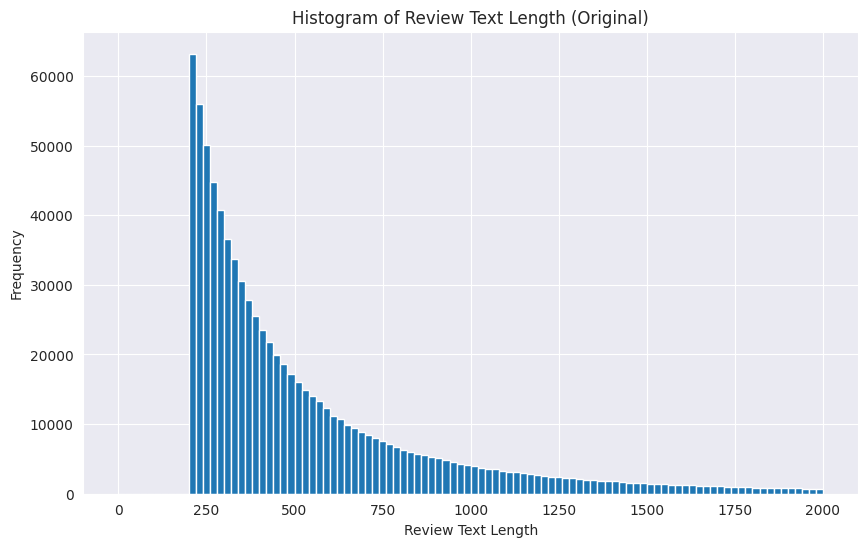

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

train_data_df['review_length'] = train_data_df['reviewText'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(train_data_df['review_length'], bins=100 , range=(0, 2000))
plt.title('Histogram of Review Text Length (Original)')
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Filter out categories with low number of samples and outliers
# Here the IQR method is used to filter out outliers

Q1 = train_data_df['review_length'].quantile(0.25)
Q3 = train_data_df['review_length'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = train_data_df.query('(@Q1 - 1.5 * @IQR) <= text_length <= (@Q3 + 1.5 * @IQR)')

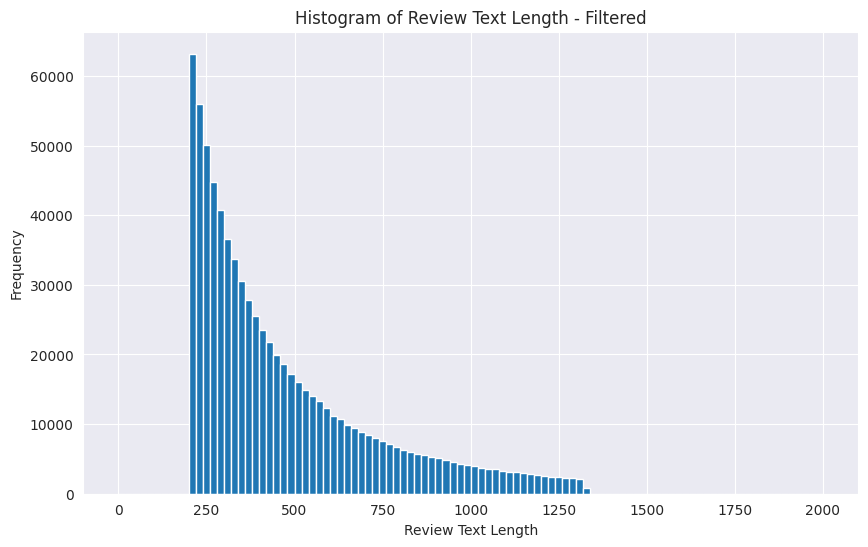

In [22]:
# Draw the histogram with the filtered mode
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['review_length'], bins=100,range=(0, 2000))
plt.title('Histogram of Review Text Length - Filtered')
plt.xlabel('Review Text Length')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Print the recommended range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"The recommended range for the length of the review text is between {lower_bound} and {upper_bound} characters.")

The recommended range for the length of the review text is between -353.0 and 1327.0 characters.



<p>
Extreme values that significantly deviate from other observations in the data, known as outliers, are caused by data variability or experimental errors. These outliers can skew data and mislead representation, affecting the mean, standard deviation, and results of statistical tests.

The Interquartile Range (IQR) method, a common outlier detection technique, is used in this task to filter out outliers in review text length. The IQR is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. Any data point below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR is considered an outlier.

Outliers in review length, which could be extremely long or short, might not represent the majority of the reviews and could potentially affect model performance. By filtering these outliers, a more accurate representation of typical review length is obtained, potentially improving model performance. However, the decision to filter outliers depends on the specific task and data, as outliers might contain valuable information in some cases.

The lower bound of the recommended range for review text length is calculated as the first quartile (Q1) minus 1.5 times the IQR. If the data is skewed or has outliers, this calculation could result in a negative number, which doesn’t make sense in the context of text length. In such cases, the lower bound is considered to be 0. Therefore, the adjusted recommended range for review text length is between 0 and 1327 characters. Any review text length outside this range could be considered an outlier.

However, experimenting with different ranges to see which gives the best performance on the validation set is always a good idea. The choice of range should be justified by the data and task, not arbitrarily chosen.</p>

## **5:&nbsp;Top 10 Products with Highest Number of 5-Star Ratings: An Analysis of Brand Name, Product Title, and Comment Count**


In [ ]:
five_star_reviews = train_data_df[train_data_df['overall'] == 5]
product_counts = five_star_reviews.groupby('asin').size()
top_10_products = product_counts.sort_values(ascending=False).head(10)
top_10_products_df = top_10_products.reset_index()
top_10_products_df = top_10_products_df.rename(columns={0: 'Number of 5-point reviews'})

merged_df_five_star_reviews = pd.merge(top_10_products_df, title_brand_df, on='asin')
merged_df_five_star_reviews = merged_df_five_star_reviews[['brand', 'title', 'Number of 5-point reviews']]
merged_df_five_star_reviews.index = range(1, len(merged_df_five_star_reviews) + 1)

print(merged_df_five_star_reviews)

                     brand                                              title  \
1     Cambridge Soundworks  OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...   
2                  NETGEAR          NETGEAR N300 WiFi Range Extender (EX2700)   
3                     Roku  Roku Streaming Stick (3600R) - HD Streaming Pl...   
4                 StarTech  StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...   
5                 Logitech  Logitech M570 Wireless Trackball Mouse &ndash;...   
6                  Samsung  Samsung 850 EVO 500GB 2.5-Inch SATA III Intern...   
7                     Asus  ASUS Tri-Band Gigabit (AC3200) WiFi Router (Up...   
8                VideoSecu  VideoSecu ML531BE TV Wall Mount for Most 27&qu...   
9   Arlo Technologies, Inc  Arlo - Wireless Home Security Camera System | ...   
10                 Samsung  Samsung 850 EVO 250GB 2.5-Inch SATA III Intern...   

    Number of 5-point reviews  
1                        1163  
2                         659  
3           

## **6:&nbsp;Analysis of Top 10 Most Commented Brands and Their Average Scores**

In [ ]:
full_detailed_df = pd.merge(train_data_df, title_brand_df, on='asin')
top_brands = full_detailed_df['brand'].value_counts().nlargest(10).index.tolist()
top_brands_df = full_detailed_df[full_detailed_df['brand'].isin(top_brands)]
average_scores = top_brands_df.groupby('brand')['overall'].mean()
average_scores = average_scores.sort_values(ascending=False).reset_index()
average_scores.rename(columns={'overall': 'Average Score'}, inplace=True)
average_scores.index = average_scores.index + 1

print(average_scores)


           brand  Average Score
1          Anker       4.244320
2   AmazonBasics       4.201468
3        Sabrent       4.028005
4        SanDisk       3.958810
5       Logitech       3.954061
6        Samsung       3.941268
7           Sony       3.938726
8        TP-LINK       3.928681
9           Asus       3.855550
10       NETGEAR       3.836274


# Enhancement of Product Warranty Satisfaction Analysis through Semantic Similarity and Typographical Error Consideration

---

<p>
In this section of the project, an advanced approach is proposed to assess user satisfaction regarding product warranties. The traditional method of searching for exact terms such as ‘warranty’ or ‘guarantee’ in user reviews is expanded upon. The limitation of this method is its inability to account for synonyms or typographical errors in these terms.

To overcome this, the proposed solution involves the use of embedding vectors, such as Word2Vec or pre-trained vectors from large language models like GPT or Cohere. These vectors will be utilized to identify words semantically similar to ‘warranty’ and ‘guarantee’.

The process will be as follows:

1. Identification of semantically similar words to ‘warranty’ and ‘guarantee’ using embedding vectors.

2. Extraction of reviews containing at least one of the identified terms, including common typographical errors.
3. Calculation of the average user satisfaction score based on the filtered reviews.

This approach aims to provide a more comprehensive and accurate analysis of user satisfaction concerning product warranties. The results obtained will be reported in this section.
</p>


In [ ]:
import pandas as pd
from gensim.models import KeyedVectors
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

similar_words = model.most_similar(positive=['warranty', 'guarantee'], topn=10)

search_terms = ['warranty', 'guarantee'] + [word for word, _ in similar_words]

df = train_data_df

relevant_reviews = df[df['reviewText'].str.contains('|'.join(search_terms))]

average_ratings = relevant_reviews.groupby('asin')['overall'].mean()
average_ratings = average_ratings.reset_index()
average_ratings.columns = ['asin', 'Average Rating']
merged_df = pd.merge(average_ratings, title_brand_df, on='asin')
result = merged_df[['title', 'brand', 'Average Rating']]


print(result)


[==================================================] 100.0% 1662.8/1662.8MB downloaded
                                                   title       brand  \
0      Canon EF 24-105mm f/4L IS USM Lens Bundle Inte...       Canon   
1      SanDisk EXTREME PRO 64GB (95MB/s) MicroSDXC wo...     SanDisk   
2      Maxell CD-330 CD-to-Cassette Audio Adapter (19...      Maxell   
3      Kensington SmartSockets 6-Outlet, 16-Foot Cord...  Kensington   
4      Kensington SmartSockets 6-Outlet, 16-Foot Cord...  Kensington   
...                                                  ...         ...   
10002  Logitech CREATE Backlit Keyboard Case with Sma...    Logitech   
10003  JAM Rhythm WiFi Home Audio Speaker with Amazon...         Jam   
10004  Dmax Armor for LG G Pad X 10.1 Screen Protecto...  Dmax Armor   
10005  Dmax Armor for Samsung Galaxy Tab E 9.6 inch S...  Dmax Armor   
10006  Bluetooth Headphones,Yostyle Wireless Headphon...     Yostyle   

       Average Rating  
0                 1.0  
